In [27]:
import numpy as np
import os
import pandas as pd
import glob
import librosa
import librosa.display

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/sanchit/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [6]:
meta_data = pd.read_csv('../UrbanSound8k/metadata/UrbanSound8k.csv')

In [7]:
fold1 = glob.glob("../UrbanSound8k/audio/fold1/*.wav")
fold2 = glob.glob("../UrbanSound8k/audio/fold2/*.wav")
fold3 = glob.glob("../UrbanSound8k/audio/fold3/*.wav")
fold4 = glob.glob("../UrbanSound8k/audio/fold4/*.wav")
fold5 = glob.glob("../UrbanSound8k/audio/fold5/*.wav")
fold6 = glob.glob("../UrbanSound8k/audio/fold6/*.wav")
fold7 = glob.glob("../UrbanSound8k/audio/fold7/*.wav")
fold8 = glob.glob("../UrbanSound8k/audio/fold8/*.wav")
fold9 = glob.glob("../UrbanSound8k/audio/fold9/*.wav")
fold10 = glob.glob("../UrbanSound8k/audio/fold10/*.wav")


In [8]:
len(fold1),len(fold2),len(fold3),len(fold4),len(fold5),len(fold6),len(fold7),len(fold8),len(fold9),len(fold10)

(873, 888, 925, 990, 936, 823, 838, 806, 816, 837)

In [9]:
train = glob.glob("../UrbanSound8k/Train/*.wav")

In [10]:
len(train)

873

In [11]:
data, srt = librosa.load(train[0])

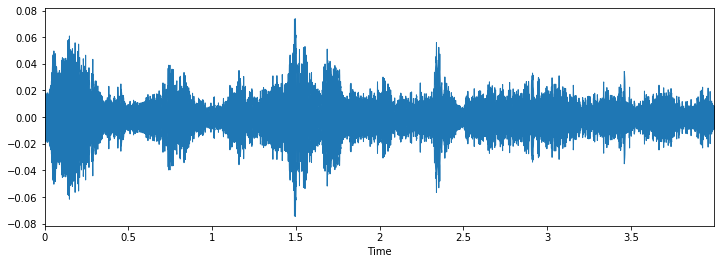

In [12]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,sr = srt)

In [13]:
metadata_by_fold = meta_data.groupby(meta_data['fold'])

In [14]:
for fold_number, grp in metadata_by_fold:
    if fold_number == 1:
        train_meta_data=grp
        break

In [15]:
train_meta_data = train_meta_data.reset_index(drop = True)

In [16]:
train_meta_data

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,101415-3-0-2.wav,101415,1.000000,5.000000,1,1,3,dog_bark
1,101415-3-0-3.wav,101415,1.500000,5.500000,1,1,3,dog_bark
2,101415-3-0-8.wav,101415,4.000000,8.000000,1,1,3,dog_bark
3,102106-3-0-0.wav,102106,2.243852,3.884477,2,1,3,dog_bark
4,102305-6-0-0.wav,102305,0.000000,2.611610,1,1,6,gun_shot
...,...,...,...,...,...,...,...,...
868,99180-9-0-2.wav,99180,1.000000,5.000000,1,1,9,street_music
869,99180-9-0-36.wav,99180,18.000000,22.000000,1,1,9,street_music
870,99180-9-0-48.wav,99180,24.000000,28.000000,1,1,9,street_music
871,99180-9-0-49.wav,99180,24.500000,28.500000,1,1,9,street_music


In [17]:
train_meta_data['class'].value_counts()

jackhammer          120
drilling            100
air_conditioner     100
dog_bark            100
children_playing    100
street_music        100
engine_idling        96
siren                86
car_horn             36
gun_shot             35
Name: class, dtype: int64

In [76]:
def parser(row):
    
    filename = os.path.join('../UrbanSound8k/Train',str(row['slice_file_name']))
    
    try:
        data, sampling_rate = librosa.load(filename, res_type = 'kaiser_fast')
        
        mfccs = np.mean((librosa.feature.mfcc(y = data, sr = sampling_rate, n_mfcc = 40)).T, axis = 0)
        
    except exception as e:
        print("Error occured while parsing: ", filename)
        return None, None
    
    feature = mfccs
    label = row['classID']
    
    return [feature, label]

In [91]:
temp = train_meta_data.apply(parser, axis = 1,result_type = 'expand')

In [95]:
temp.columns = ['feature', 'label']

In [96]:
temp.head()

,feature,label
0,"[-403.96762, 94.398056, 17.75182, -11.521063, ...",3
1,"[-368.11002, 128.74481, 28.91274, -21.190062, ...",3
2,"[-422.47903, 70.38345, 9.934866, 0.00061676267...",3
3,"[-260.24, 109.35184, -51.811287, -4.287414, -1...",3
4,"[-386.7848, 132.62964, 25.220673, 22.799534, -...",6


In [97]:
X = np.array(temp.feature.tolist())
Y = np.array(temp.label.tolist())